In [1]:
import scanpy as sc
import pandas as pd

import numpy
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [5]:
cd /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN

/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN


# Global objects

In [6]:
clusters = ['0', '1', '2', '3', '4', '5', '6', '7']

In [7]:
adata = sc.read_h5ad("adata_aggregated_gene.leiden.h5ad")

In [8]:
gex_topic_list = [col for col in adata.obs if col.startswith("topic")]

In [9]:
chrs = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16',
       'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY']

In [10]:
atac_data = sc.read_h5ad("adata_aggregated_peak.leiden.h5ad")

In [11]:
atac_topic_list = [col for col in atac_data.obs if col.startswith("topic")]

# Copy umap from GEX data to atac data

In [10]:
numpy.any(atac_data.obs.index == adata.obs.index)

True

In [11]:
atac_data.obsm['X_umap'] = adata.obsm['X_umap']

# Plot Umap based on clustering

In [45]:
adata.obs

AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_major_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'topic_dendogram', 'umap'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'
    obsp: 'connectivities',

/ihome/djishnu/jas1165/miniforge-pypy3/envs/chrombpnet/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


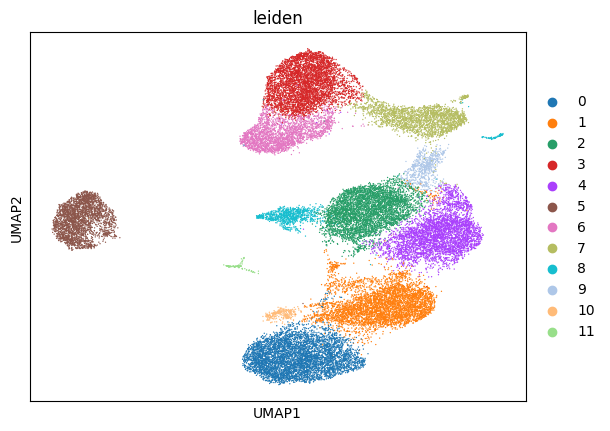

In [5]:
sc.pl.umap(adata, color=["leiden"])

# Create single bam file from all three runs

In [14]:
!samtools merge /ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_day0_2/outs/atac_possorted_bam.bam /ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_day3_4/outs/atac_possorted_bam.bam /ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_day5_6/outs/atac_possorted_bam.bam -o atac_possorted_bam_merge.bam

# Check that the merged file has the appropriate number of reads

In [16]:
!samtools view -c atac_possorted_bam_merge.bam

1612196574


In [17]:
!samtools view -c /ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_day0_2/outs/atac_possorted_bam.bam

519870156


In [18]:
!samtools view -c /ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_day3_4/outs/atac_possorted_bam.bam

583969066


In [19]:
!samtools view -c /ix/djishnu/Common_Folder/Jingyu_Data/multiome_1st_donor_UPMC_day5_6/outs/atac_possorted_bam.bam

508357352


In [5]:
519870156 + 583969066 + 508357352 == 1612196574

True

# Check that the merged file is properly sorted

In [30]:
!samtools view atac_possorted_bam_merge.bam | head

A00522:234:HMMCHDRX2:2:2261:7401:5071	147	chr1	9995	0	3M1I45M	=	10021	-22	GTCACGATAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC	,F,,:,,,,FFFF:,FFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFF	NM:i:1	MD:Z:48	AS:i:45	XS:i:43	CR:Z:GTATTCGTCAGCCTTA	CY:Z:FFFFFFFFFFFFFFFF	CB:Z:GTGTCCAAGGTTTGCG-1	BC:Z:TTCTACAG	QT:Z:FFFFFFFF	RG:Z:multiome_1st_donor_UPMC_day5_6:MissingLibrary:1:HMMCHDRX2:2
A00522:234:HMMCHDRX2:2:2263:27642:11381	99	chr1	9997	0	50M	=	10179	231	CCCATAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:F:F	NM:i:1	MD:Z:2G47	AS:i:47	XS:i:47	CR:Z:TGAGATTCATATGGTG	CY:Z:FFFFFFFFFFFFFFFF	CB:Z:CTTGCATGTTTATTCG-1	BC:Z:GGCGTTTC	QT:Z:FFFFFFFF	RG:Z:multiome_1st_donor_UPMC_day0_2:MissingLibrary:1:HMMCHDRX2:2
A00522:234:HMMCHDRX2:1:2203:9941:4398	99	chr1	9997	0	50M	=	10114	160	CCCATAACCCTAACCCTAACCCTAACCCTAAACCAAACCCAAACCCTAAA	F,F,FFFFF:FFFFFF:FFFF:FFFFFF,F,:F:,FF,,F,F:,F:,FF,	NM:i:5	MD:Z:2G28C2T5T8C0	AS:i:31	XS:i:36	CR:Z:GAAGGAATCAAGGGTT	CY:Z:FFF:,FFFFFFFFFFF	CB:Z:CGTTTG

# Pull out tags for each cluster from h5 file

In [45]:
dic = {'1': '_day0_2', '2': '_day3_4', '3': '_day5_6'}

In [54]:
for i in clusters:
    cluster = pd.DataFrame(adata[adata.obs.leiden.isin([i])].obs_names)
    for j in ['1', '2', '3']:
        sub = pd.DataFrame([x for x in cluster[0] if j in x])
        if len(sub)==0:
            continue
        barcode = [brcd.split('-')[0] for brcd in sub[0].to_list()]
        sub[0] = barcode
        sub[1] = i
        sub.to_csv('cluster_' + i + dic[j] + '_tags.tsv', header=None, index=None, sep = "\t")

# Extract reads from merged bam file for each cluster using sinto (sinto_pseudobulk.slurm on CRC)

# Merge separate bam files together for each cluster

In [6]:
!samtools merge cluster_0_tags/day0_2/0.bam cluster_0_tags/day3_4/0.bam -o cluster_0_tags/cluster_0_merge.bam

In [7]:
!samtools merge cluster_1_tags/day0_2/1.bam cluster_1_tags/day3_4/1.bam cluster_1_tags/day5_6/1.bam -o cluster_1_tags/cluster_1_merge.bam

In [8]:
!samtools merge cluster_2_tags/day0_2/2.bam cluster_2_tags/day3_4/2.bam cluster_2_tags/day5_6/2.bam -o cluster_2_tags/cluster_2_merge.bam

In [9]:
!samtools merge cluster_3_tags/day0_2/3.bam cluster_3_tags/day3_4/3.bam cluster_3_tags/day5_6/3.bam -o cluster_3_tags/cluster_3_merge.bam

In [7]:
!samtools merge cluster_4_tags/day0_2/4.bam cluster_4_tags/day3_4/4.bam cluster_4_tags/day5_6/4.bam -o cluster_4_tags/cluster_4_merge.bam

In [8]:
!samtools merge cluster_5_tags/day0_2/5.bam cluster_5_tags/day3_4/5.bam -o cluster_5_tags/cluster_5_merge.bam

In [9]:
!samtools merge cluster_6_tags/day0_2/6.bam cluster_6_tags/day3_4/6.bam cluster_6_tags/day5_6/6.bam -o cluster_6_tags/cluster_6_merge.bam

In [10]:
!samtools merge cluster_7_tags/day0_2/7.bam cluster_7_tags/day3_4/7.bam cluster_7_tags/day5_6/7.bam -o cluster_7_tags/cluster_7_merge.bam

# Call peaks from merged bam file

In [5]:
!macs2 callpeak -t atac_possorted_bam_merge.bam -n peak_calling_merge --outdir full_peaks/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Sun, 07 Apr 2024 10:48:47: 
# Command line: callpeak -t atac_possorted_bam_merge.bam -n peak_calling_merge --outdir full_peaks/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_merge
# format = BAMPE
# ChIP-seq file = ['atac_possorted_bam_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per million reads
 
INFO  @ Sun, 07 Apr 2024 10:4

# Filter peaks to remove unassembled contigs

In [3]:
cluster = pd.read_table('full_peaks/peak_calling_merge_peaks.narrowPeak', header=None)

In [5]:
cluster[cluster[0].isin(chrs)].to_csv('full_peaks/peak_calling_merge_peaks_Filtered.narrowPeak', header=None, index=None, sep='\t')

# Call peaks from each cluster (manually done here, can also use macs2_peak_calling.slurm on CRC)

In [11]:
!macs2 callpeak -t cluster_0_tags/cluster_0_merge.bam -n peak_calling_cluster_0 --outdir cluster_specific_peaks/cluster_0/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Wed, 10 Apr 2024 11:52:34: 
# Command line: callpeak -t cluster_0_tags/cluster_0_merge.bam -n peak_calling_cluster_0 --outdir cluster_specific_peaks/cluster_0/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_0
# format = BAMPE
# ChIP-seq file = ['cluster_0_tags/cluster_0_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [12]:
!macs2 callpeak -t cluster_1_tags/cluster_1_merge.bam -n peak_calling_cluster_1 --outdir cluster_specific_peaks/cluster_1/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Wed, 10 Apr 2024 13:21:05: 
# Command line: callpeak -t cluster_1_tags/cluster_1_merge.bam -n peak_calling_cluster_1 --outdir cluster_specific_peaks/cluster_1/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_1
# format = BAMPE
# ChIP-seq file = ['cluster_1_tags/cluster_1_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [13]:
!macs2 callpeak -t cluster_2_tags/cluster_2_merge.bam -n peak_calling_cluster_2 --outdir cluster_specific_peaks/cluster_2/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Wed, 10 Apr 2024 13:32:04: 
# Command line: callpeak -t cluster_2_tags/cluster_2_merge.bam -n peak_calling_cluster_2 --outdir cluster_specific_peaks/cluster_2/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_2
# format = BAMPE
# ChIP-seq file = ['cluster_2_tags/cluster_2_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [14]:
!macs2 callpeak -t cluster_3_tags/cluster_3_merge.bam -n peak_calling_cluster_3 --outdir cluster_specific_peaks/cluster_3/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Wed, 10 Apr 2024 13:48:47: 
# Command line: callpeak -t cluster_3_tags/cluster_3_merge.bam -n peak_calling_cluster_3 --outdir cluster_specific_peaks/cluster_3/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_3
# format = BAMPE
# ChIP-seq file = ['cluster_3_tags/cluster_3_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [11]:
!macs2 callpeak -t cluster_4_tags/cluster_4_merge.bam -n peak_calling_cluster_4 --outdir cluster_specific_peaks/cluster_4/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Thu, 11 Apr 2024 11:21:05: 
# Command line: callpeak -t cluster_4_tags/cluster_4_merge.bam -n peak_calling_cluster_4 --outdir cluster_specific_peaks/cluster_4/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_4
# format = BAMPE
# ChIP-seq file = ['cluster_4_tags/cluster_4_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [12]:
!macs2 callpeak -t cluster_5_tags/cluster_5_merge.bam -n peak_calling_cluster_5 --outdir cluster_specific_peaks/cluster_5/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Thu, 11 Apr 2024 11:32:09: 
# Command line: callpeak -t cluster_5_tags/cluster_5_merge.bam -n peak_calling_cluster_5 --outdir cluster_specific_peaks/cluster_5/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_5
# format = BAMPE
# ChIP-seq file = ['cluster_5_tags/cluster_5_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [13]:
!macs2 callpeak -t cluster_6_tags/cluster_6_merge.bam -n peak_calling_cluster_6 --outdir cluster_specific_peaks/cluster_6/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Thu, 11 Apr 2024 11:34:33: 
# Command line: callpeak -t cluster_6_tags/cluster_6_merge.bam -n peak_calling_cluster_6 --outdir cluster_specific_peaks/cluster_6/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_6
# format = BAMPE
# ChIP-seq file = ['cluster_6_tags/cluster_6_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

In [14]:
!macs2 callpeak -t cluster_7_tags/cluster_7_merge.bam -n peak_calling_cluster_7 --outdir cluster_specific_peaks/cluster_7/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE

INFO  @ Thu, 11 Apr 2024 11:39:15: 
# Command line: callpeak -t cluster_7_tags/cluster_7_merge.bam -n peak_calling_cluster_7 --outdir cluster_specific_peaks/cluster_7/ --shift -75 --ext 150 --pvalue 0.01 --nomodel -B --SPMR --keep-dup all --call-summits -f BAMPE
# ARGUMENTS LIST:
# name = peak_calling_cluster_7
# format = BAMPE
# ChIP-seq file = ['cluster_7_tags/cluster_7_merge.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# pvalue cutoff = 1.00e-02
# qvalue will not be calculated and reported as -1 in the final output.
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
# Searching for subpeak summits is on
# MACS will save fragment pileup signal per mil

# Filter peaks to remove unassembled contigs

In [15]:
for i in clusters:
    cluster = pd.read_table('cluster_specific_peaks/cluster_' + i + '/peak_calling_cluster_' + i + '_peaks.narrowPeak', header=None)
    cluster[cluster[0].isin(chrs)].to_csv('cluster_specific_peaks/cluster_' + i + '/peak_calling_cluster_' + i + '_peaks_Filtered.narrowPeak', header=None, index=None, sep='\t')

# Get number of peaks in each cluster

In [20]:
for i in clusters:
    cluster = pd.read_table('cluster_specific_peaks/cluster_' + i + '/peak_calling_cluster_' + i + '_peaks_Filtered.narrowPeak', header=None)
    print('cluster_' + i, len(cluster[0]))

cluster_0 199154
cluster_1 263301
cluster_2 261808
cluster_3 309413
cluster_4 278670
cluster_5 134224
cluster_6 253555
cluster_7 198943


In [ ]:
199154 + 263301 + 261808 + 309413 + 278670 + 134224 + 253555 + 198943

In [ ]:
1899068

# Get union set of peaks

In [33]:
for i in clusters:
    cluster_path = 'cluster_specific_peaks/cluster_' + i + '/peak_calling_cluster_' + i + '_peaks_Filtered.narrowPeak'
    out_path = 'full_peaks/cluster_union/peak_calling_union_peaks_Filtered_cat.narrowPeak'
    !cat {cluster_path} >> {out_path}

In [34]:
!sort -k1,1 -k2,2n full_peaks/cluster_union/peak_calling_union_peaks_Filtered_cat.narrowPeak > full_peaks/cluster_union/peak_calling_union_peaks_Filtered_cat_sorted.narrowPeak

In [6]:
!bedtools merge -i full_peaks/cluster_union/peak_calling_union_peaks_Filtered_cat_sorted.narrowPeak -c 4,5,6,7,8,9,10 -o collapse,max,distinct,mean,mean,mean,max -delim "|" > full_peaks/cluster_union/peak_calling_union_peaks_Filtered_merged.narrowPeak

# Index the merged bam files for each cluster

In [5]:
for i in clusters:
    reads_path = 'cluster_' + i + '_tags/cluster_' + i + '_merge.bam'
    out_path = 'cluster_' + i + '_tags/cluster_' + i + '_merge.bam.bai'
    !samtools index -M -b {reads_path} -o {out_path}

# Train bias model using union set of peaks (chrombpnet_bias_model.slurm)

# Train cluster specific models (chrombpnet_cluster#.slurm)

# Generate bigwig files for each cluster (bamCoverage.slurm)

# Generate contribution score tracks (chrombpnet_cluster#_CS_track.slurm)

# Create bedgraphs from contribution score bigwigs

In [33]:
cd /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/cluster_specific_models/

/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/cluster_specific_models


In [36]:
for i in clusters:
    bw_path = 'cluster_' + i + '/Primary_Human_GRN_Cluster_' + i + '.CS.counts_scores.bw'
    bedgraph_path = 'cluster_' + i + '/Primary_Human_GRN_Cluster_' + i + '.CS.counts_scores.bedGraph'
    filtered_path = 'cluster_' + i + '/Primary_Human_GRN_Cluster_' + i + '.CS.counts_scores.filtered.bedGraph'
    #Convert bigwig to bedGraph
    !/ihome/djishnu/jas1165/ucsc_utilities/bigWigToBedGraph {bw_path} {bedgraph_path}
    #Intersect with the original peak calling
    !bedtools intersect -u -a {bedgraph_path} -b /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/full_peaks/cluster_union/peak_calling_union_peaks_Filtered_merged.narrowPeak > {filtered_path}
    print('Finished cluster ' + i)

Finished cluster 4
Finished cluster 5
Finished cluster 6
Finished cluster 7


# Calculate the cutoff for peak calling (macs3_cutoff_analysis.slurm)

# Cutoff set at 0.02 for all clusters

# Call peaks on CS count tracks (macs3_CS_peak_calling.slurm)

# Trim CS peaks to 30bp and filter to remove unassembled contigs

In [4]:
cd /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/cluster_specific_models/

/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/cluster_specific_models


In [5]:
for i in clusters:
    in_path = 'cluster_' + i + '/Primary_Human_GRN_Cluster_' + i + '.CS_c0.0_l5_g5_peaks.narrowPeak'
    out_path = 'cluster_' + i + '/Primary_Human_GRN_Cluster_' + i + '.CS_c0.0_l5_g5_peaks_trim.narrowPeak'
    cs_peaks = pd.read_table(in_path, skiprows=1, header = None)
    cs_peaks[10] = cs_peaks[2] - cs_peaks[1]
    cs_peaks_trim = cs_peaks[cs_peaks[10] <= 30]
    cs_peaks_trim[cs_peaks_trim[0].isin(chrs)].to_csv(out_path, sep = "\t", header = False, index = False)

In [13]:
numpy.median(cs_peaks_trim[10])

9.0

# Plot topic compositions over umap

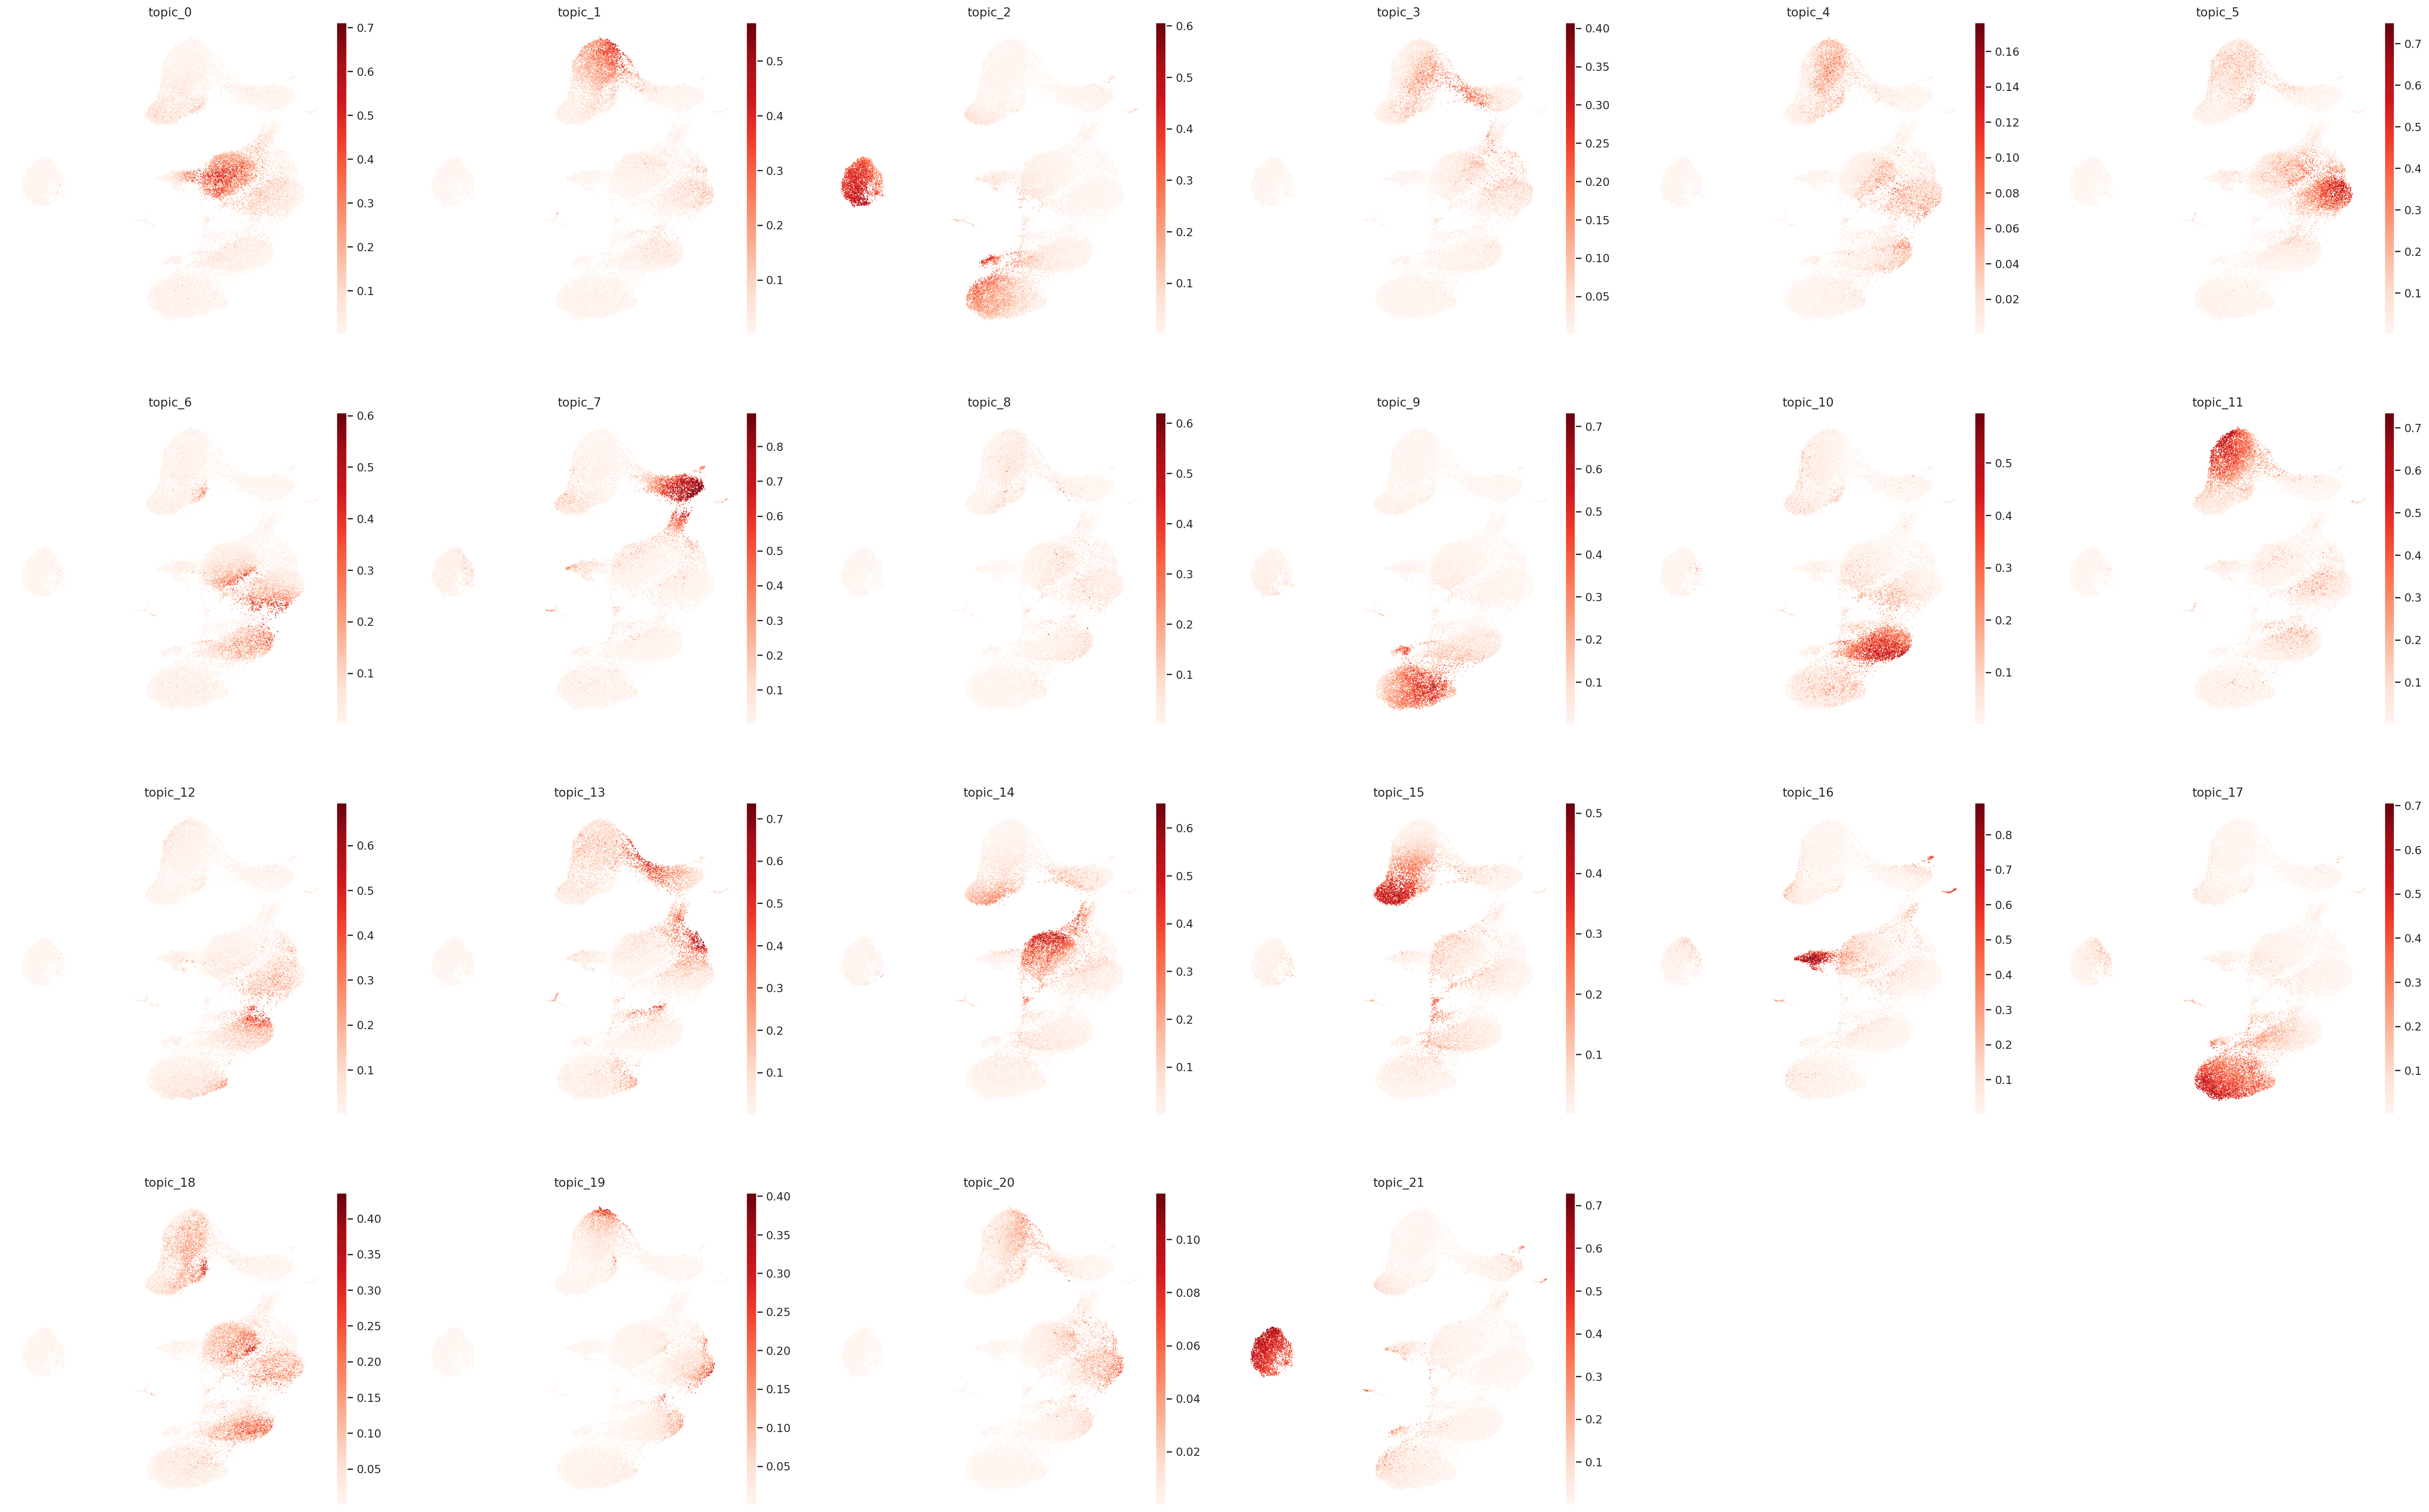

In [110]:
sc.set_figure_params(scanpy=True, fontsize=14, dpi_save = 350)
sns.set(rc={'figure.figsize':(6,6)})

sc.pl.umap(atac_data, color = atac_topic_list, frameon = False, cmap = 'Reds', use_raw = None, s = 4, ncols = 6, show=False)

plt.savefig("/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/atac_topics.jpeg")

# Get chromatin topics for each cluster

In [389]:
cd /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/

/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN


In [134]:
sum(~numpy.isnan(atac_data.varm['topic_feature_activations']))

array([191255, 191255, 191255, 191255, 191255, 191255, 191255, 191255,
       191255, 191255, 191255, 191255, 191255, 191255, 191255, 191255,
       191255, 191255, 191255, 191255, 191255, 191255])

In [35]:
cluster_zscores_mat = []
topic_comps = []
for topic in atac_topic_list:
    topic_comps = pd.DataFrame(list(zip(atac_data.obs[topic],atac_data.obs['leiden_joint'])), columns=["topic composition", "cluster"])
    cluster_means = topic_comps.groupby("cluster").mean()
    cluster_zscores = stats.zscore(cluster_means)
    cluster_zscores_mat.append(cluster_zscores[cluster_zscores.index.isin(clusters)]["topic composition"].values.tolist())

In [36]:
cluster_zscores_mat_ann = []
for i in range(0,len(cluster_zscores_mat)):
    row = []
    for j in range(0,len(cluster_zscores_mat[0])):
        if(cluster_zscores_mat[i][j]>=2):
            row.append('*')
        else:
            row.append('')
    cluster_zscores_mat_ann.append(row)

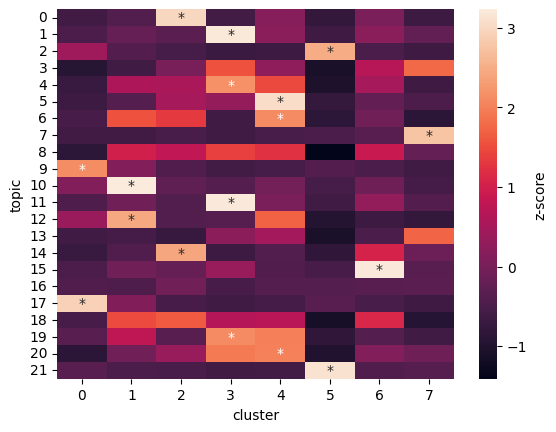

In [37]:
ax = sns.heatmap(cluster_zscores_mat, annot=cluster_zscores_mat_ann, fmt='')
ax.set(xlabel="cluster", ylabel="topic")
ax.collections[0].colorbar.set_label("z-score")
plt.savefig("/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/topic_cluster_assignment_heatmap.jpeg")

In [19]:
cluster_topic_assignments = []
topic_comps = []
for topic in atac_topic_list:
    topic_comps = pd.DataFrame(list(zip(atac_data.obs[topic],atac_data.obs['leiden_joint'])), columns=["topic composition", "cluster"])
    cluster_means = topic_comps.groupby("cluster").mean()
    cluster_zscores = stats.zscore(cluster_means)
    print(topic)
    print(cluster_zscores)
    cluster_topic_assignments.append((cluster_zscores>=2)[cluster_zscores.index.isin(clusters)].values.tolist())

topic_0
         topic composition
cluster                   
0                -0.601538
1                -0.422150
10               -0.479336
11               -0.517701
2                 2.994053
3                -0.590919
4                 0.156015
5                -0.776095
6                 0.040295
7                -0.651834
8                 0.767294
9                 0.081916
topic_1
         topic composition
cluster                   
0                -0.482709
1                -0.184448
10               -0.602876
11               -0.139975
2                -0.316460
3                 3.196880
4                 0.195391
5                -0.635553
6                 0.195531
7                -0.247724
8                -0.558757
9                -0.419302
topic_2
         topic composition
cluster                   
0                 0.423276
1                -0.405572
10                1.714271
11               -0.046115
2                -0.551004
3                -0.689636
4   

In [20]:
cluster_topic_assignments = pd.DataFrame(data=cluster_topic_assignments,index=atac_topic_list, columns=["cluster_" + i for i in clusters])

In [21]:
cluster_topic_assignments

cluster_0 cluster_1 cluster_2 cluster_3 cluster_4 cluster_5  \
topic_0    [False]   [False]    [True]   [False]   [False]   [False]   
topic_1    [False]   [False]   [False]    [True]   [False]   [False]   
topic_2    [False]   [False]   [False]   [False]   [False]    [True]   
topic_3    [False]   [False]   [False]   [False]   [False]   [False]   
topic_4    [False]   [False]   [False]    [True]   [False]   [False]   
topic_5    [False]   [False]   [False]   [False]    [True]   [False]   
topic_6    [False]   [False]   [False]   [False]    [True]   [False]   
topic_7    [False]   [False]   [False]   [False]   [False]   [False]   
topic_8    [False]   [False]   [False]   [False]   [False]   [False]   
topic_9     [True]   [False]   [False]   [False]   [False]   [False]   
topic_10   [False]    [True]   [False]   [False]   [False]   [False]   
topic_11   [False]   [False]   [False]    [True]   [False]   [False]   
topic_12   [False]    [True]   [False]   [False]   [False]   [False]   
topic_13   [False]   [False]   [False]   [False]   [False]   [False]   
topic_14   [False]   [False]    [True]   [False]   [False]   [False]   
topic_15   [False]   [False]   [False]   [False]   [False]   [False]   
topic_16   [False]   [False]   [False]   [False]   [False]   [False]   
topic_17    [True]   [False]   [False]   [False]   [False]   [False]   
topic_18   [False]   [False]   [False]   [False]   [False]   [False]   
topic_19   [False]   [False]   [False]    [True]   [False]   [False]   
topic_20   [False]   [False]   [False]   [False]    [True]   [False]   
topic_21   [False]   [False]   [False]   [False]   [False]    [True]   

         cluster_6 cluster_7  
topic_0    [False]   [False]  
topic_1    [False]   [False]  
topic_2    [False]   [False]  
topic_3    [False]   [False]  
topic_4    [False]   [False]  
topic_5    [False]   [False]  
topic_6    [False]   [False]  
topic_7    [False]    [True]  
topic_8    [False]   [False]  
topic_9    [False]   [False]  
topic_10   [False]   [False]  
topic_11   [False]   [False]  
topic_12   [False]   [False]  
topic_13   [False]   [False]  
topic_14   [False]   [False]  
topic_15    [True]   [False]  
topic_16   [False]   [False]  
topic_17   [False]   [False]  
topic_18   [False]   [False]  
topic_19   [False]   [False]  
topic_20   [False]   [False]  
topic_21   [False]   [False]

# Get top peaks from each topic

In [143]:
atac_data.varm['topic_feature_activations']

array([[ 0.67976677, -0.36774531,  0.31229228, ...,  1.26569891,
         4.94321585,  0.56462532],
       [ 1.22423053,  0.84062898,  0.22536419, ..., -3.81727123,
         8.24339581, -2.72675729],
       [-0.02259856, -2.21408033,  0.09303594, ...,  2.31221008,
         4.92447472,  1.97756243],
       ...,
       [ 0.17319155,  2.63188934,  1.09091878, ...,  0.75025809,
         5.49716091,  2.8914969 ],
       [ 1.23179197,  0.55953127, -1.07987142, ...,  1.53615439,
         2.94488215, -0.32899946],
       [ 0.67996407, -1.77707899,  2.2667079 , ..., -1.25660789,
         2.09707403,  1.22112715]])

In [121]:
atac_data.var[0:191194]

gene_ids feature_types  genome
chr1:9809-10677                chr1:9809-10677         Peaks  GRCh38
chr1:28988-29868              chr1:28988-29868         Peaks  GRCh38
chr1:180722-180992          chr1:180722-180992         Peaks  GRCh38
chr1:181093-181802          chr1:181093-181802         Peaks  GRCh38
chr1:267555-268452          chr1:267555-268452         Peaks  GRCh38
...                                        ...           ...     ...
chrY:56727681-56728567  chrY:56727681-56728567         Peaks  GRCh38
chrY:56734343-56735240  chrY:56734343-56735240         Peaks  GRCh38
chrY:56763076-56763973  chrY:56763076-56763973         Peaks  GRCh38
chrY:56829173-56830139  chrY:56829173-56830139         Peaks  GRCh38
chrY:56836573-56837477  chrY:56836573-56837477         Peaks  GRCh38

[191194 rows x 3 columns]

In [20]:
peak_names_trim = [s for s in [x[0:4] for x in atac_data.var['gene_ids']] if(s in chrs)]

In [132]:
len(atac_data.varm['topic_feature_activations'][0:191194])

191194

In [41]:
peak_topic_assignments = []
top_range = 10000
for i in range(0,len(atac_topic_list)):
    peak_comps = []
    for peak in atac_data.varm['topic_feature_activations'][0:191194]:
        peak_comps.append(peak[i])
    peak_comps_df = pd.DataFrame(list(zip(peak_comps,atac_data.var['gene_ids'][0:191194])), columns=["topic activations", "peak"])
    peak_comps_df = peak_comps_df.sort_values('topic activations', ascending=False)
    
    print(atac_topic_list[i])
    print(peak_comps_df.head())
    print()
    peak_topic_assignments.append(peak_comps_df['peak'][0:top_range].tolist())
    peak_comps_df.to_csv('chromatin_topic_top_peaks/topic_' + str(i) + '_peaks.tsv', index=None, sep = "\t")

topic_0
        topic activations                       peak
166026           6.616800   chr7:107151740-107152606
3885             6.337405     chr1:35807797-35808629
122804           6.207533   chr3:123447726-123448593
33855            6.030275  chr11:111298874-111299715
22969            6.014015    chr10:80535541-80536453

topic_1
        topic activations                      peak
170230           8.454569    chr8:19267201-19268133
8057             8.432242  chr1:100459253-100460143
12616            8.240830  chr1:179935912-179936798
4619             8.222427    chr1:41876725-41877658
150138           8.083302    chr6:31878340-31879251

topic_2
        topic activations                      peak
129219           5.091887    chr4:15006175-15007044
47789            4.986989   chr13:49580568-49581458
169474           4.930215      chr8:6732876-6733688
133406           4.884588  chr4:105140660-105141578
57653            4.749760   chr15:44295534-44296231

topic_3
        topic activatio

In [134]:
peak_topic_assignments[7]

['chr18:23191976-23192833',
 'chr10:124084352-124085151',
 'chr3:98770146-98771002',
 'chr10:124152773-124153661',
 'chr6:2931841-2932739',
 'chr22:41782478-41783155',
 'chr16:14357037-14357932',
 'chr2:195470628-195471565',
 'chr12:94465079-94465835',
 'chr10:119211659-119212575',
 'chr2:226845387-226846235',
 'chrX:139930986-139931582',
 'chr4:55545733-55546327',
 'chr17:7996924-7997824',
 'chr10:124079522-124080445',
 'chr6:119330303-119331006',
 'chr2:172545871-172546770',
 'chr15:68298706-68299630',
 'chr17:15436410-15437263',
 'chr1:43454277-43455032',
 'chr3:185362739-185363548',
 'chr4:184453270-184454173',
 'chr6:136761509-136762079',
 'chr5:88821009-88821789',
 'chr7:75409626-75410524',
 'chr1:161013408-161014333',
 'chr17:77212188-77213083',
 'chr12:92555912-92556745',
 'chr15:52677556-52678367',
 'chr5:39190987-39191666',
 'chr3:66485277-66486172',
 'chr18:63316703-63317362',
 'chr14:32215482-32216411',
 'chr5:139638330-139639075',
 'chr1:58903356-58904262',
 'chr16:3150793

# Check that top peaks from this method versus method provided by Jingyu

In [47]:
index_test = pd.read_csv('/ix/djishnu/peasena/primary_multiome/donor1_upmc/topic7_top_peaks.csv', header=None)

In [136]:
for i in range(0,len(index_test)): 
    print(atac_data.var['gene_ids'][index_test.iat[i,0]] in peak_topic_assignments[7])
    print(i)

True
0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105
True
106
True
107
True
108
True
109
True
110
True
111
True
112
True
113
True
114
True
115
True
116
True
117
True
118
True
119
True
120
True
121
True
122
Tru

In [137]:
atac_data.var['gene_ids'][index_test.iat[i,0]]

'KI270721.1:8391-9274'

# Make bed file from each peak topic assignments output

In [138]:
cd /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/

/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN


In [139]:
for i in range(0,len(atac_topic_list)):
    bed = []
    bed_path = 'chromatin_topic_top_peaks/topic_' + str(i) + '_peaks.bed'
    for j in range(0,len(peak_topic_assignments[i])):
        bed.append(re.split(':|-',peak_topic_assignments[i][j]))
    pd.DataFrame(bed).to_csv(bed_path, header=None, index=None, sep='\t')

# Get CS peaks that intersect each topic assignment bed file

In [121]:
cd /ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/

/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN


In [24]:
cluster_topic_assignments_dict

{'topic_0': 'cluster_2',
 'topic_1': 'cluster_3',
 'topic_2': 'cluster_5',
 'topic_4': 'cluster_3',
 'topic_5': 'cluster_4',
 'topic_6': 'cluster_4',
 'topic_7': 'cluster_7',
 'topic_9': 'cluster_0',
 'topic_10': 'cluster_1',
 'topic_11': 'cluster_3',
 'topic_12': 'cluster_1',
 'topic_14': 'cluster_2',
 'topic_15': 'cluster_6',
 'topic_17': 'cluster_0',
 'topic_19': 'cluster_3',
 'topic_20': 'cluster_4',
 'topic_21': 'cluster_5'}

In [ ]:
cluster_topic_assignments_dict = {}
for i in range(0,cluster_topic_assignments.shape[0]):
    for j in range(0,cluster_topic_assignments.shape[1]):
        check = cluster_topic_assignments.iat[i,j] == [True]
        if check:
            cluster_topic_assignments_dict[cluster_topic_assignments.index[i]] = cluster_topic_assignments.columns[j]

In [142]:
for key in cluster_topic_assignments_dict:
    bed_path = 'chromatin_topic_top_peaks/' + key + '_peaks.bed'
    out_path = 'chromatin_topic_top_peaks/' + key + '_peaks_intersect.bed'
    cs_path = 'cluster_CS_peaks/Primary_Human_GRN_' + cluster_topic_assignments_dict[key] + '.CS_c0.0_l5_g5_peaks_trim.narrowPeak'
    #Intersect 
    !bedtools intersect -u -a {cs_path} -b {bed_path} > {out_path}
    print('Finished ' + key)

Finished topic_0
Finished topic_1
Finished topic_2
Finished topic_4
Finished topic_5
Finished topic_6
Finished topic_7
Finished topic_9
Finished topic_10
Finished topic_11
Finished topic_12
Finished topic_14
Finished topic_15
Finished topic_17
Finished topic_19
Finished topic_20
Finished topic_21


# Run homer with annotations on each topic (homer_annotate_Primary_Human_GRN_donor1.slurm)

# Get gene expression topics for each cluster

In [19]:
adata.obs

cell_type_major  n_genes  n_genes_by_counts  total_counts  \
AAACAGCCAAAGCTAA-1          day0_2      916                915        1483.0   
AAACAGCCAAGCCACT-3          day5_6     3582               3580        8281.0   
AAACAGCCAAGGTGCA-1          day0_2     2416               2415        4951.0   
AAACAGCCAAGTTATC-1          day0_2     1435               1435        2449.0   
AAACAGCCAATAGCCC-1          day0_2     1349               1349        2316.0   
...                            ...      ...                ...           ...   
TTTGTTGGTTTACGTC-1          day0_2     1205               1205        2080.0   
TTTGTTGGTTTAGTCC-1          day0_2     1037               1037        1645.0   
TTTGTTGGTTTATGGG-2          day3_4     3668               3665        9880.0   
TTTGTTGGTTTCCTCC-3          day5_6     3396               3395        7535.0   
TTTGTTGGTTTGAGGC-2          day3_4     4273               4271       11710.0   

                    total_counts_mt  pct_counts_mt   topic_0   topic_1  \
AAACAGCCAAAGCTAA-1             46.0       3.101821  0.008554  0.013326   
AAACAGCCAAGCCACT-3            846.0      10.216157  0.018575  0.013160   
AAACAGCCAAGGTGCA-1            471.0       9.513230  0.038631  0.025551   
AAACAGCCAAGTTATC-1            216.0       8.819926  0.015908  0.023365   
AAACAGCCAATAGCCC-1            138.0       5.958549  0.011711  0.010980   
...                             ...            ...       ...       ...   
TTTGTTGGTTTACGTC-1            180.0       8.653847  0.015295  0.009921   
TTTGTTGGTTTAGTCC-1            115.0       6.990881  0.029035  0.010833   
TTTGTTGGTTTATGGG-2           1349.0      13.653846  0.037438  0.088532   
TTTGTTGGTTTCCTCC-3            576.0       7.644326  0.012554  0.016904   
TTTGTTGGTTTGAGGC-2            985.0       8.411613  0.035164  0.308480   

                     topic_2   topic_3  ...  topic_23  topic_24  topic_25  \
AAACAGCCAAAGCTAA-1  0.005968  0.009061  ...  0.009603  0.001036  0.344527   
AAACAGCCAAGCCACT-3  0.008065  0.036125  ...  0.012317  0.002080  0.003144   
AAACAGCCAAGGTGCA-1  0.318661  0.011544  ...  0.028957  0.048143  0.006310   
AAACAGCCAAGTTATC-1  0.006621  0.007612  ...  0.006327  0.073392  0.003274   
AAACAGCCAATAGCCC-1  0.044246  0.010271  ...  0.010731  0.233737  0.007977   
...                      ...       ...  ...       ...       ...       ...   
TTTGTTGGTTTACGTC-1  0.008505  0.012338  ...  0.009460  0.041654  0.002768   
TTTGTTGGTTTAGTCC-1  0.004626  0.020678  ...  0.007923  0.158421  0.008085   
TTTGTTGGTTTATGGG-2  0.019982  0.024211  ...  0.044906  0.002678  0.003895   
TTTGTTGGTTTCCTCC-3  0.005928  0.023279  ...  0.007671  0.001807  0.002697   
TTTGTTGGTTTGAGGC-2  0.013582  0.014606  ...  0.014498  0.002727  0.002633   

                    topic_26  topic_27  topic_28  topic_29  topic_30  \
AAACAGCCAAAGCTAA-1  0.008153  0.007636  0.028283  0.007059  0.011389   
AAACAGCCAAGCCACT-3  0.016438  0.021354  0.015850  0.041346  0.142783   
AAACAGCCAAGGTGCA-1  0.006267  0.006088  0.016106  0.018310  0.021403   
AAACAGCCAAGTTATC-1  0.004771  0.003579  0.069117  0.009880  0.009367   
AAACAGCCAATAGCCC-1  0.005874  0.004840  0.024568  0.008620  0.010898   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTTTACGTC-1  0.002833  0.002968  0.046270  0.007879  0.010312   
TTTGTTGGTTTAGTCC-1  0.004471  0.003782  0.025382  0.007486  0.008327   
TTTGTTGGTTTATGGG-2  0.014462  0.008084  0.062829  0.035809  0.020924   
TTTGTTGGTTTCCTCC-3  0.005694  0.007759  0.027900  0.009798  0.161564   
TTTGTTGGTTTGAGGC-2  0.035454  0.008303  0.025116  0.026442  0.015129   

                    topic_31  leiden  
AAACAGCCAAAGCTAA-1  0.008495       5  
AAACAGCCAAGCCACT-3  0.029666       3  
AAACAGCCAAGGTGCA-1  0.015911       1  
AAACAGCCAAGTTATC-1  0.014217       0  
AAACAGCCAATAGCCC-1  0.008227       0  
...                      ...     ...  
TTTGTTGGTTTACGTC-1  0.017323       0  
TTTGTTGGTTTAGTCC-1  0.015666       0  
TTTGTTGGTTTATGGG-2  0.024675

In [20]:
cluster_zscores_mat = []
topic_comps = []
for topic in gex_topic_list:
    topic_comps = pd.DataFrame(list(zip(adata.obs[topic],adata.obs['leiden'])), columns=["topic composition", "cluster"])
    cluster_means = topic_comps.groupby("cluster").mean()
    cluster_zscores = stats.zscore(cluster_means)
    cluster_zscores_mat.append(cluster_zscores[cluster_zscores.index.isin(clusters)]["topic composition"].values.tolist())

In [21]:
cluster_zscores_mat_ann = []
for i in range(0,len(cluster_zscores_mat)):
    row = []
    for j in range(0,len(cluster_zscores_mat[0])):
        if(cluster_zscores_mat[i][j]>=2):
            row.append('*')
        else:
            row.append('')
    cluster_zscores_mat_ann.append(row)

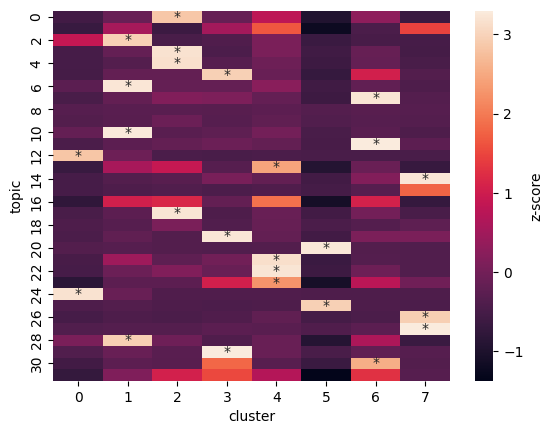

In [22]:
ax = sns.heatmap(cluster_zscores_mat, annot=cluster_zscores_mat_ann, fmt='')
ax.set(xlabel="cluster", ylabel="topic")
ax.collections[0].colorbar.set_label("z-score")
plt.savefig("/ix/djishnu/Jered/chrombpnet/Primary_Human_GRN/gex_topic_cluster_assignment_heatmap.jpeg")

In [23]:
cluster_topic_assignments = []
topic_comps = []
for topic in gex_topic_list:
    topic_comps = pd.DataFrame(list(zip(adata.obs[topic],adata.obs['leiden'])), columns=["topic composition", "cluster"])
    cluster_means = topic_comps.groupby("cluster").mean()
    cluster_zscores = stats.zscore(cluster_means)
    print(topic)
    print(cluster_zscores)
    cluster_topic_assignments.append((cluster_zscores>=2)[cluster_zscores.index.isin(clusters)].values.tolist())

topic_0
         topic composition
cluster                   
0                -0.555358
1                -0.120303
10               -0.378649
11               -1.132989
2                 2.854537
3                -0.133398
4                 0.811455
5                -0.953114
6                 0.300232
7                -0.646685
8                 0.038853
9                -0.084581
topic_1
         topic composition
cluster                   
0                -0.670279
1                 0.554776
10               -0.692164
11               -1.377636
2                -0.630784
3                 0.521271
4                 1.642237
5                -1.207148
6                -0.457214
7                 1.464119
8                -0.387800
9                 1.240621
topic_2
         topic composition
cluster                   
0                 0.882171
1                 2.958826
10                0.330914
11               -0.754959
2                -0.465439
3                -0.399633
4   

In [24]:
cluster_topic_assignments = pd.DataFrame(data=cluster_topic_assignments,index=gex_topic_list, columns=["cluster_" + i for i in clusters])

In [25]:
cluster_topic_assignments

cluster_0 cluster_1 cluster_2 cluster_3 cluster_4 cluster_5  \
topic_0    [False]   [False]    [True]   [False]   [False]   [False]   
topic_1    [False]   [False]   [False]   [False]   [False]   [False]   
topic_2    [False]    [True]   [False]   [False]   [False]   [False]   
topic_3    [False]   [False]    [True]   [False]   [False]   [False]   
topic_4    [False]   [False]    [True]   [False]   [False]   [False]   
topic_5    [False]   [False]   [False]    [True]   [False]   [False]   
topic_6    [False]    [True]   [False]   [False]   [False]   [False]   
topic_7    [False]   [False]   [False]   [False]   [False]   [False]   
topic_8    [False]   [False]   [False]   [False]   [False]   [False]   
topic_9    [False]   [False]   [False]   [False]   [False]   [False]   
topic_10   [False]    [True]   [False]   [False]   [False]   [False]   
topic_11   [False]   [False]   [False]   [False]   [False]   [False]   
topic_12    [True]   [False]   [False]   [False]   [False]   [False]   
topic_13   [False]   [False]   [False]   [False]    [True]   [False]   
topic_14   [False]   [False]   [False]   [False]   [False]   [False]   
topic_15   [False]   [False]   [False]   [False]   [False]   [False]   
topic_16   [False]   [False]   [False]   [False]   [False]   [False]   
topic_17   [False]   [False]    [True]   [False]   [False]   [False]   
topic_18   [False]   [False]   [False]   [False]   [False]   [False]   
topic_19   [False]   [False]   [False]    [True]   [False]   [False]   
topic_20   [False]   [False]   [False]   [False]   [False]    [True]   
topic_21   [False]   [False]   [False]   [False]    [True]   [False]   
topic_22   [False]   [False]   [False]   [False]    [True]   [False]   
topic_23   [False]   [False]   [False]   [False]    [True]   [False]   
topic_24    [True]   [False]   [False]   [False]   [False]   [False]   
topic_25   [False]   [False]   [False]   [False]   [False]    [True]   
topic_26   [False]   [False]   [False]   [False]   [False]   [False]   
topic_27   [False]   [False]   [False]   [False]   [False]   [False]   
topic_28   [False]    [True]   [False]   [False]   [False]   [False]   
topic_29   [False]   [False]   [False]    [True]   [False]   [False]   
topic_30   [False]   [False]   [False]   [False]   [False]   [False]   
topic_31   [False]   [False]   [False]   [False]   [False]   [False]   

         cluster_6 cluster_7  
topic_0    [False]   [False]  
topic_1    [False]   [False]  
topic_2    [False]   [False]  
topic_3    [False]   [False]  
topic_4    [False]   [False]  
topic_5    [False]   [False]  
topic_6    [False]   [False]  
topic_7     [True]   [False]  
topic_8    [False]   [False]  
topic_9    [False]   [False]  
topic_10   [False]   [False]  
topic_11    [True]   [False]  
topic_12   [False]   [False]  
topic_13   [False]   [False]  
topic_14   [False]    [True]  
topic_15   [False]   [False]  
topic_16   [False]   [False]  
topic_17   [False]   [False]  
topic_18   [False]   [False]  
topic_19   [False]   [False]  
topic_20   [False]   [False]  
topic_21   [False]   [False]  
topic_22   [False]   [False]  
topic_23   [False]   [False]  
topic_24   [False]   [False]  
topic_25   [False]   [False]  
topic_26   [False]    [True]  
topic_27   [False]    [True]  
topic_28   [False]   [False]  
topic_29   [False]   [False]  
topic_30    [True]   [False]  
topic_31   [False]   [False]

In [ ]:
adata.var['gene_ids']

In [29]:
adata.varm['topic_feature_activations']

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-1.80447054,  1.91432965,  1.05424321, ..., -1.76797628,
        -1.09480333, -1.72657371],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [34]:
gene_topic_assignments = []
top_range = 270
for i in range(0,len(gex_topic_list)):
    gene_comps = []
    for gene in adata.varm['topic_feature_activations']:
        gene_comps.append(gene[i])
    gene_comps_df = pd.DataFrame(list(zip(gene_comps,adata.var['gene_ids'])), columns=["topic activations", "gene"])
    gene_comps_df = gene_comps_df.sort_values('topic activations', ascending=False)
    
    print(gex_topic_list[i])
    print(gene_comps_df.head())
    print()
    gene_topic_assignments.append(gene_comps_df['gene'][0:top_range].tolist())
    gene_comps_df.to_csv('gex_topic_top_genes/topic_' + str(i) + '_genes.tsv', index=None, sep = "\t")
    

topic_0
       topic activations             gene
18411           7.452536  ENSG00000267121
125             6.402056  ENSG00000049249
9088            6.377644  ENSG00000184408
1078            5.957487  ENSG00000134243
13359           5.701119  ENSG00000284634

topic_1
       topic activations             gene
22735           7.671324  ENSG00000072133
11548           6.782460  ENSG00000156113
2386            6.576632  ENSG00000233005
15051           6.488347  ENSG00000184304
4376            6.460793  ENSG00000144724

topic_2
       topic activations             gene
22456           7.072433  ENSG00000165186
22453           6.536152  ENSG00000233067
14138           6.218460  ENSG00000136048
558             5.792726  ENSG00000185668
4505            5.621460  ENSG00000170017

topic_3
       topic activations             gene
12119           6.419233  ENSG00000183801
3308            6.346370  ENSG00000136531
10573           6.196118  ENSG00000165113
1078            6.152187  ENSG00000134243